# **Predicting Hospital Readmissions: Is Diabetes a Key Predictor?**

### Group 7
Members:
*   Hussain Nathani - G36308827
*   Jasreen Mehta - G43643634
*   Mohammed Ismail Sarfaraz Shaik - G23033389

## **Project Overview**

Hospital readmissions are a critical concern in the healthcare system, often reflecting the quality of patient care and resulting in significant financial and operational implications for both patients and providers. Despite improvements in medical practices, many readmissions remain preventable, particularly among patients with chronic conditions such as diabetes.

In this project, we explore hospital readmission patterns by analyzing a decade’s worth of anonymized patient records from the "Predicting Hospital Readmissions" dataset. We place a special emphasis on diabetes-related factors, given diabetes' well-established link to increased hospitalization risk and complex healthcare management.
Our central research question is:

**"Is diabetes a strong predictor of hospital readmission?"**

To address this, we apply data science and machine learning techniques to build predictive models and analyze the impact of key diabetes-related indicators — such as glucose serum measurements, A1C test results, and diabetes medication prescriptions — on readmission outcomes.

Our objectives are twofold:

First, to identify and interpret the most important predictors influencing readmission risk, particularly those associated with diabetes.

Second, to develop and evaluate machine learning models capable of accurately predicting a patient’s likelihood of readmission, providing insights that could support more proactive and preventive healthcare interventions.

Through this work, we aim to demonstrate how predictive modeling can contribute to improving patient outcomes, optimizing healthcare resources, and ultimately, reducing the burden of avoidable readmissions.

## **Dataset Description**
The dataset used in this project is sourced from Kaggle – [Predicting Hospital Readmissions](https://www.kaggle.com/datasets/dubradave/hospital-readmissions). It contains over 100,000 anonymized hospital admission records from a ten-year period.

Each record represents a patient’s hospital visit and includes features such as:

*   Demographics: e.g., age, gender
*   Hospital Stay: e.g., time_in_hospital, n_procedures, n_medications
*   Healthcare Utilization: e.g., number of outpatient, inpatient, and emergency visits
*   Diagnosis Codes: diag_1, diag_2, diag_3
*   Diabetes-Related Indicators: glucose_test, A1Ctest, change, diabetes_med
*   Medical Specialty of the admitting doctor

**The variable we aim to predict is:**

*   readmitted – indicates whether the patient was readmitted to the hospital within a certain timeframe (binary: 'yes' or 'no')

This column will serve as our target for binary classification. The goal is to identify patients at high risk of readmission, with a focus on understanding the role of diabetes in that outcome.

#Data Cleaning and Preprocessing

In [ ]:
from google.colab import drive
import sys

# Mount Google Drive
drive.mount('/content/drive')

# Get the absolute path of the current folder
abspath_curr = '/content/drive/MyDrive/ML/Project/'

# Get the absolute path of the shallow utilities folder
abspath_util_shallow = '/content/drive/MyDrive/ML/Project/'

# Get the absolute path of the shallow models folder
abspath_model_shallow = '/content/drive/MyDrive/ML/Project/'

Mounted at /content/drive


In [ ]:
import warnings

# Ignore warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

# Set matplotlib sizes
plt.rc('font', size=20)
plt.rc('axes', titlesize=20)
plt.rc('axes', labelsize=20)
plt.rc('xtick', labelsize=20)
plt.rc('ytick', labelsize=20)
plt.rc('legend', fontsize=20)
plt.rc('figure', titlesize=20)

In [ ]:
# The magic below allows us to use tensorflow version 2.x
!pip install tensorflow
%tensorflow_version 2.x
import tensorflow as tf
from tensorflow import keras

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [ ]:
# The random seed
random_seed = 42

# Set random seed in tensorflow
tf.random.set_seed(random_seed)

# Set random seed in numpy
import numpy as np
np.random.seed(random_seed)

In [ ]:
# Change working directory to the absolute path of the shallow utilities folder
%cd $abspath_util_shallow

# Import the shallow utitilities
%run pmlm_utilities_shallow.ipynb

/content/drive/MyDrive/ML/Project


In [ ]:
import pandas as pd

# Load the raw data
df_raw = pd.read_csv(abspath_curr + '/hospital_readmissions.csv',
                     header=0)

# Make a copy of df_raw
df = df_raw.copy(deep=True)

# Get the name of the target
target = 'readmitted'#

In [ ]:
pd.DataFrame([[df.shape[0], df.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,25000,17


In [ ]:
df.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[70-80),8,72,1,18,2,0,0,Missing,Circulatory,Respiratory,Other,no,no,no,yes,no
1,[70-80),3,34,2,13,0,0,0,Other,Other,Other,Other,no,no,no,yes,no
2,[50-60),5,45,0,18,0,0,0,Missing,Circulatory,Circulatory,Circulatory,no,no,yes,yes,yes
3,[70-80),2,36,0,12,1,0,0,Missing,Circulatory,Other,Diabetes,no,no,yes,yes,yes
4,[60-70),1,42,0,7,0,0,0,InternalMedicine,Other,Circulatory,Respiratory,no,no,no,yes,no


###Sample of Dataset Records:
A snapshot of the dataset illustrates several important characteristics:

* Demographics and Clinical Features: Attributes like age, time_in_hospital, n_lab_procedures, n_medications, and medical_specialty describe the patient's profile and the extent of their hospital care.

* Diagnosis Information: The dataset includes three diagnosis codes (diag_1, diag_2, diag_3), allowing analysis of multiple health conditions associated with each patient visit.

* Diabetes Indicators: Features such as glucose_test, A1Ctest, change (medication change), and diabetes_med specifically target diabetes management.

* Target Variable: The readmitted column serves as the binary classification target, indicating whether the patient was readmitted (yes) or not (no).

In [ ]:
from sklearn.model_selection import train_test_split

# Divide the data into training (60%) and test (40%)
df_train, df_test = train_test_split(df,
                                     train_size=0.6,
                                     random_state=random_seed,
                                     stratify=df[target])

# Divide the test data into validation (50%) and test (50%)
df_val, df_test = train_test_split(df_test,
                                   train_size=0.5,
                                   random_state=random_seed,
                                   stratify=df_test[target])

# Reset the index
df_train, df_val, df_test = df_train.reset_index(drop=True), df_val.reset_index(drop=True), df_test.reset_index(drop=True)

In [ ]:
# Print the dimension of df_train
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,15000,17


In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,5000,17


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,5000,17


In [ ]:
# Call common_var_checker
# See the implementation in pmlm_utilities.ipynb
df_common_var = common_var_checker(df_train, df_val, df_test, target)

# Print df_common_var
df_common_var

,common var
0,A1Ctest
1,age
2,change
3,diabetes_med
4,diag_1
5,diag_2
6,diag_3
7,glucose_test
8,medical_specialty
9,n_emergency


In [ ]:
# Get the features in the training data but not in the validation or test data
uncommon_feature_train_not_val_test = np.setdiff1d(df_train.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_train_not_val_test, columns=['uncommon feature'])

,uncommon feature


In [ ]:
# Get the features in the validation data but not in the training or test data
uncommon_feature_val_not_train_test = np.setdiff1d(df_val.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_val_not_train_test, columns=['uncommon feature'])

,uncommon feature


In [ ]:
# Get the features in the test data but not in the training or validation data
uncommon_feature_test_not_train_val = np.setdiff1d(df_test.columns, df_common_var['common var'])

# Print the uncommon features
pd.DataFrame(uncommon_feature_test_not_train_val, columns=['uncommon feature'])

,uncommon feature


In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

In [ ]:
# Call id_checker on df
# See the implementation in pmlm_utilities.ipynb
df_id = id_checker(df)

# Print the first 5 rows of df_id
df_id.head()

""
0
1
2
3
4


In [ ]:
import numpy as np

# Remove identifiers from df_train
df_train.drop(columns=np.intersect1d(df_id.columns, df_train.columns), inplace=True)

# Remove identifiers from df_val
df_val.drop(columns=np.intersect1d(df_id.columns, df_val.columns), inplace=True)

# Remove identifiers from df_test
df_test.drop(columns=np.intersect1d(df_id.columns, df_test.columns), inplace=True)

In [ ]:
# Print the first 5 rows of df_train
df_train.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[80-90),5,10,0,15,1,0,0,Missing,Other,Other,Other,high,no,yes,yes,no
1,[60-70),1,59,0,14,0,0,0,Missing,Respiratory,Circulatory,Other,no,no,yes,yes,no
2,[70-80),3,11,0,18,0,0,0,Missing,Respiratory,Respiratory,Circulatory,normal,no,no,yes,no
3,[80-90),4,39,0,6,0,1,1,Emergency/Trauma,Diabetes,Circulatory,Other,no,no,yes,yes,yes
4,[70-80),12,70,1,45,0,2,0,Missing,Injury,Circulatory,Respiratory,no,no,yes,yes,yes


In [ ]:
df_val.head()

,age,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,medical_specialty,diag_1,diag_2,diag_3,glucose_test,A1Ctest,change,diabetes_med,readmitted
0,[50-60),4,37,0,7,0,0,0,Missing,Respiratory,Circulatory,Diabetes,no,no,no,no,yes
1,[70-80),4,77,0,12,4,1,0,Other,Circulatory,Circulatory,Other,no,no,yes,yes,yes
2,[90-100),4,47,1,16,0,0,0,Missing,Respiratory,Respiratory,Respiratory,no,no,no,no,no
3,[70-80),6,44,0,27,0,0,1,InternalMedicine,Digestive,Diabetes,Respiratory,no,high,yes,yes,yes
4,[80-90),7,46,0,17,0,0,0,InternalMedicine,Other,Other,Respiratory,no,no,yes,yes,yes


In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

In [ ]:
# Call nan_checker on df
# See the implementation in pmlm_utilities.ipynb
df_nan = nan_checker(df)

# Print df_nan
df_nan

,var,proportion,dtype


In [ ]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,15000,17


In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,5000,17


In [ ]:
# Combine df_train, df_val and df_test
df = pd.concat([df_train, df_val, df_test], sort=False)

# Print the unique data type of variables in df
pd.DataFrame(df.dtypes.unique(), columns=['dtype'])

,dtype
0,object
1,int64


In [ ]:
# Call cat_var_checker on df
# See the implementation in pmlm_utilities.ipynb
df_cat = cat_var_checker(df)

# Print the dataframe
df_cat

,var,nunique
0,diag_2,8
1,diag_1,8
2,diag_3,8
3,medical_specialty,7
4,age,6
5,glucose_test,3
6,A1Ctest,3
7,change,2
8,diabetes_med,2
9,readmitted,2


###Identification of Categorical Variables

Using the cat_var_checker function, we identified the categorical variables in the dataset along with the number of unique categories for each.
A total of 10 categorical variables were detected:

* Features like diag_1, diag_2, and diag_3 (primary and secondary diagnoses) have 8 unique categories each.

* medical_specialty includes 7 specialties, while age is divided into 6 age brackets.

* Diabetes-related indicators such as glucose_test, A1Ctest, change, and diabetes_med have between 2 and 3 unique values.

* The target variable readmitted is binary with 2 unique outcomes.


In [ ]:
# One-hot-encode the categorical features in the combined data
df = pd.get_dummies(df, columns=np.setdiff1d(df_cat['var'], [target]))

# Print the first 5 rows of df
df.head()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,readmitted,A1Ctest_high,A1Ctest_no,...,glucose_test_high,glucose_test_no,glucose_test_normal,medical_specialty_Cardiology,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_InternalMedicine,medical_specialty_Missing,medical_specialty_Other,medical_specialty_Surgery
0,5,10,0,15,1,0,0,no,False,True,...,True,False,False,False,False,False,False,True,False,False
1,1,59,0,14,0,0,0,no,False,True,...,False,True,False,False,False,False,False,True,False,False
2,3,11,0,18,0,0,0,no,False,True,...,False,False,True,False,False,False,False,True,False,False
3,4,39,0,6,0,1,1,yes,False,True,...,False,True,False,False,True,False,False,False,False,False
4,12,70,1,45,0,2,0,yes,False,True,...,False,True,False,False,False,False,False,True,False,False


In [ ]:
from sklearn.preprocessing import LabelEncoder

# The LabelEncoder
le = LabelEncoder()

# Encode categorical target in the combined data
df[target] = le.fit_transform(df[target])

# Print the first 5 rows of df
df.head()

,time_in_hospital,n_lab_procedures,n_procedures,n_medications,n_outpatient,n_inpatient,n_emergency,readmitted,A1Ctest_high,A1Ctest_no,...,glucose_test_high,glucose_test_no,glucose_test_normal,medical_specialty_Cardiology,medical_specialty_Emergency/Trauma,medical_specialty_Family/GeneralPractice,medical_specialty_InternalMedicine,medical_specialty_Missing,medical_specialty_Other,medical_specialty_Surgery
0,5,10,0,15,1,0,0,0,False,True,...,True,False,False,False,False,False,False,True,False,False
1,1,59,0,14,0,0,0,0,False,True,...,False,True,False,False,False,False,False,True,False,False
2,3,11,0,18,0,0,0,0,False,True,...,False,False,True,False,False,False,False,True,False,False
3,4,39,0,6,0,1,1,1,False,True,...,False,True,False,False,True,False,False,False,False,False
4,12,70,1,45,0,2,0,1,False,True,...,False,True,False,False,False,False,False,True,False,False


###Encoding Categorical Variables

* To prepare the data for machine learning models, we first applied one-hot encoding to all categorical features except the target variable. This transformation expanded categorical columns (such as medical_specialty, A1Ctest, and glucose_test) into multiple binary indicator variables, ensuring that models would not assume any ordinal relationship between the original categories.

* After one-hot encoding, the dataset structure changed: for each categorical feature, several new columns were created, each representing one category. This increased the overall dimensionality of the dataset but allowed the models to treat each category independently during training.

* Subsequently, the target variable readmitted was processed separately using label encoding. The binary target was converted from textual labels ('yes', 'no') to numeric form (1 for 'yes' and 0 for 'no'), enabling compatibility with classifiers that expect numerical targets.


In [ ]:
# Separating the training data
df_train = df.iloc[:df_train.shape[0], :]

# Separating the validation data
df_val = df.iloc[df_train.shape[0]:df_train.shape[0] + df_val.shape[0], :]

# Separating the test data
df_test = df.iloc[df_train.shape[0] + df_val.shape[0]:, :]

In [ ]:
pd.DataFrame([[df_train.shape[0], df_train.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,15000,55


In [ ]:
# Print the dimension of df_val
pd.DataFrame([[df_val.shape[0], df_val.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,5000,55


In [ ]:
# Print the dimension of df_test
pd.DataFrame([[df_test.shape[0], df_test.shape[1]]], columns=['# rows', '# columns'])

,# rows,# columns
0,5000,55


In [ ]:
# Get the feature matrix
X_train = df_train[np.setdiff1d(df_train.columns, [target])].values
X_val = df_val[np.setdiff1d(df_val.columns, [target])].values
X_test = df_test[np.setdiff1d(df_test.columns, [target])].values

# Get the target vector
y_train = df_train[target].values
y_val = df_val[target].values
y_test = df_test[target].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# The MinMaxScaler
mms = MinMaxScaler()

In [ ]:
# Normalize the training data
X_mms_train = mms.fit_transform(X_train)

# Normalize the validation data
X_mms_val = mms.transform(X_val)

# Normalize the test data
X_mms_test = mms.transform(X_test)

In [ ]:
from sklearn.preprocessing import StandardScaler

# The StandardScaler
ss = StandardScaler()

In [ ]:
# Standardize the training data
X_train = ss.fit_transform(X_train)

# Standardize the validation data
X_val = ss.transform(X_val)

# Standardize the test data
X_test = ss.transform(X_test)

In [ ]:
X = df.drop(columns=[target])  # Before split

In [ ]:
feature_names = X.columns.tolist()

In [ ]:
pd.Series(y_train).value_counts()

,count
0,7948
1,7052


###Data Normalization and Standardization

To prepare the features for machine learning models, we performed two scaling transformations:

* Min-Max Scaling: Initially, we applied Min-Max normalization to the training, validation, and test sets using the MinMaxScaler. This transformation scaled all feature values into the [0, 1] range, preserving the relationships between features while normalizing their magnitude.

* Standardization: Following normalization, we applied StandardScaler to standardize features by removing the mean and scaling them to unit variance. This step ensures that the feature distributions are centered around zero with a standard deviation of one, which is particularly beneficial for models sensitive to feature scaling such as logistic regression and neural networks.

By applying both transformations, we ensured that the data was appropriately scaled for different types of models considered in this project.

# EDA

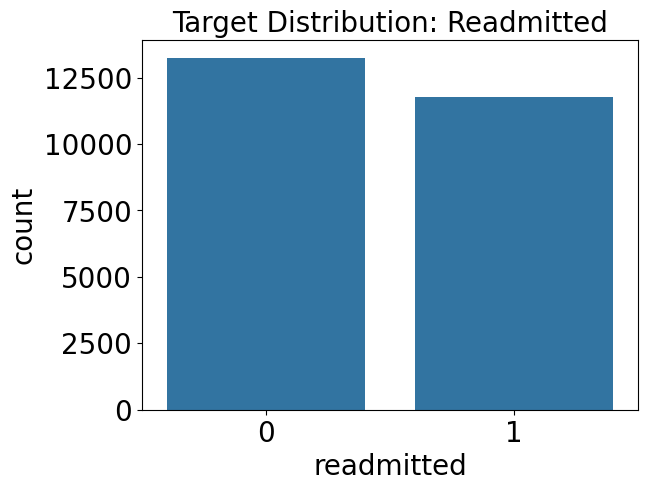

readmitted
0    52.984
1    47.016
Name: proportion, dtype: float64


In [ ]:
import seaborn as sns
if 'readmitted' in df.columns:
    sns.countplot(data=df, x='readmitted')
    plt.title('Target Distribution: Readmitted')
    plt.show()
else:
    print("No 'readmitted' column found. Please check target column name.")

readmitted_percent = df['readmitted'].value_counts(normalize=True) * 100
print(readmitted_percent)

###Distribution of Target Variable: Readmitted

The first step of exploratory data analysis focused on understanding the distribution of the target variable readmitted, which indicates whether a patient was readmitted to the hospital.

The bar plot shows that the class distribution is approximately 53% non-readmitted vs. 47% readmitted, reflecting a moderate imbalance.

While not perfectly balanced, this level of disparity is manageable and does not necessitate aggressive resampling techniques. Instead, during modeling, the slight imbalance will be addressed by using methods such as setting class_weight='balanced' for certain classifiers.

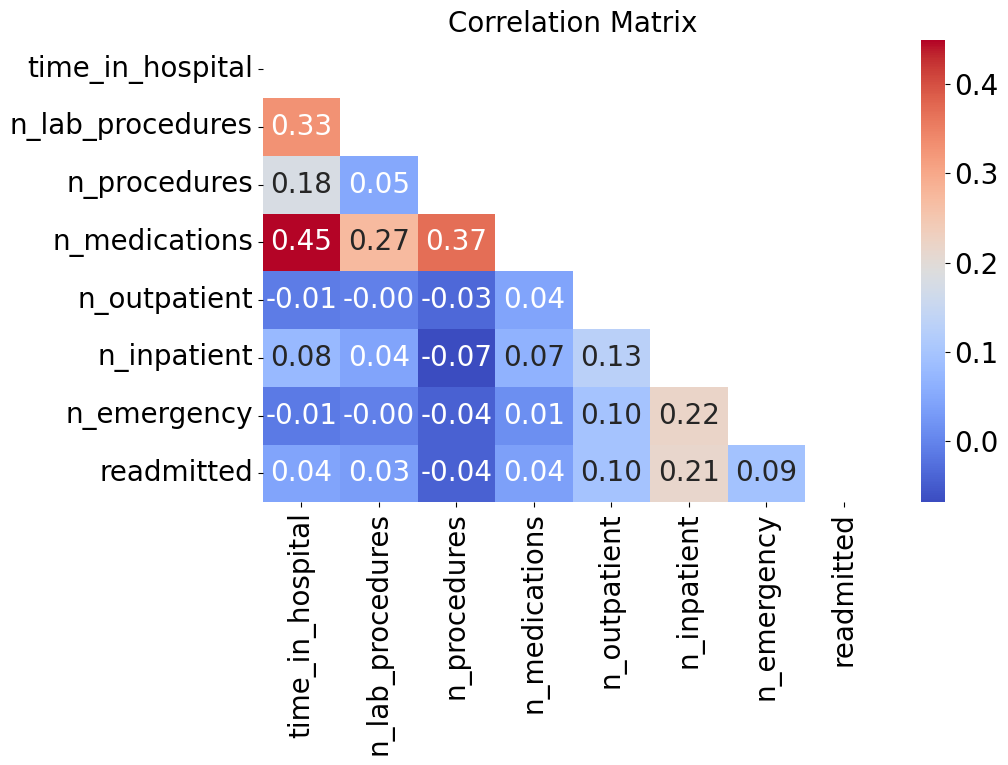

In [ ]:
num_cols = df.select_dtypes(include=['int64', 'float64'])

# Compute correlation matrix
corr = num_cols.corr()

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', mask=np.triu(np.ones_like(corr, dtype=bool)))
plt.title("Correlation Matrix")
plt.show()

###Correlation Analysis of Numerical Features

The correlation matrix highlights the relationships between continuous numerical features in the dataset, including hospitalization metrics, procedural counts, and the target variable readmitted.
Key observations:

* n_medications shows a moderate positive correlation with time_in_hospital (0.45) and n_procedures (0.37), suggesting that longer stays and more procedures are associated with a higher number of medications administered.

* n_lab_procedures is moderately correlated with time_in_hospital (0.33).

* The correlations between numerical features and the target readmitted are relatively low, with the strongest being n_inpatient (0.21) and n_emergency (0.10).

Overall, the weak direct correlations with readmitted imply that single numerical variables alone are unlikely to predict readmission strongly. Instead, model performance will likely depend on the interaction between multiple features.

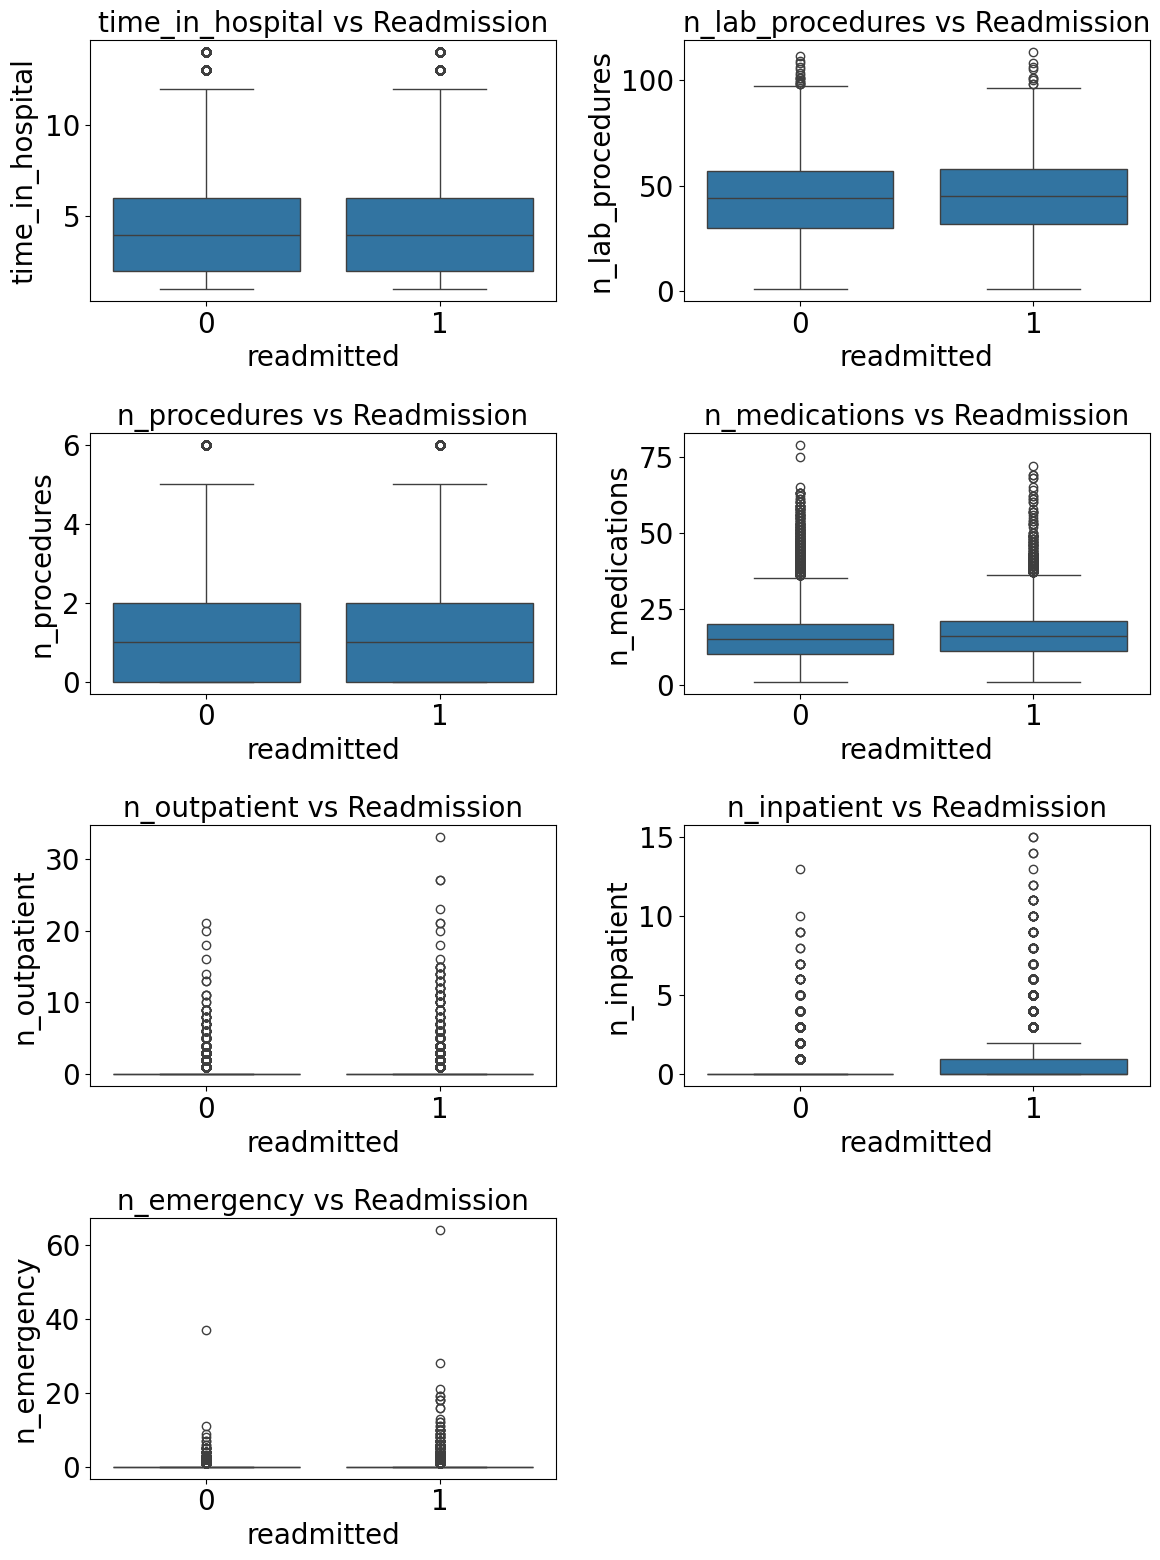

In [ ]:
# Get numeric columns except 'readmitted'
if 'readmitted' in df.columns:
    num_cols = df.select_dtypes(include=['int64', 'float64']).columns.drop('readmitted', errors='ignore')

    # Set up the subplot grid
    n_cols = 2
    n_rows = int(np.ceil(len(num_cols) / n_cols))

    fig, axes = plt.subplots(n_rows, n_cols, figsize=(12, 4 * n_rows))
    axes = axes.flatten()

    # Create boxplots
    for i, col in enumerate(num_cols):
        sns.boxplot(data=df, x='readmitted', y=col, ax=axes[i])
        axes[i].set_title(f'{col} vs Readmission')

    # Hide unused subplots if any
    for j in range(i + 1, len(axes)):
        fig.delaxes(axes[j])

    plt.tight_layout()
    plt.show()

###Analysis of Numerical Features

Boxplots were generated to compare the distributions of key numerical features (such as time_in_hospital, n_lab_procedures, n_procedures, n_medications, and visit counts) between readmitted and non-readmitted patients.
Observations:

* Most features display some extreme values (outliers), particularly for n_medications, n_lab_procedures, n_inpatient, and n_emergency.

* Median values for most features are relatively similar between the two readmission classes, though n_inpatient and n_emergency counts tend to be slightly higher for readmitted patients.


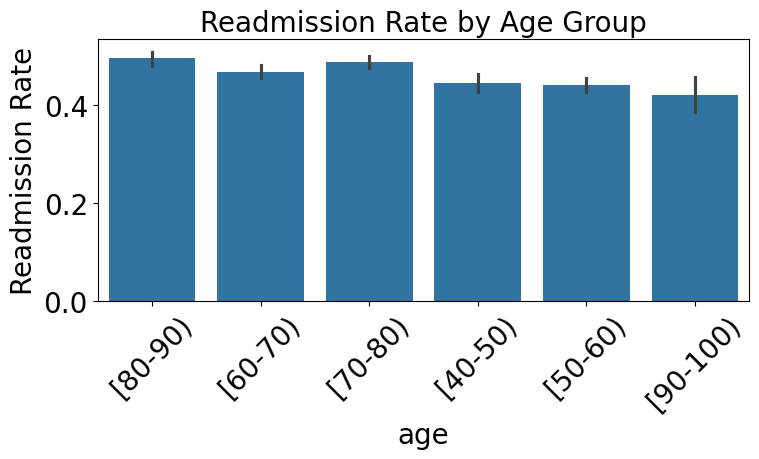

In [ ]:
age_cols = [col for col in df.columns if col.startswith('age_')]
df['age'] = df[age_cols].idxmax(axis=1).str.replace('age_', '')

plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='age', y='readmitted', estimator=lambda x: sum(x)/len(x))
plt.title('Readmission Rate by Age Group')
plt.ylabel('Readmission Rate')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


###Relationship Between Age and Readmission Rate

The bar plot displays the average readmission rate across different age groups.
Key observations:

* Patients aged 80–90 and 70–80 exhibit the highest readmission rates, suggesting that older patients are at a greater risk of being readmitted.

* Readmission rates slightly decrease in younger groups like 50–60 and 40–50.

* Interestingly, patients in the 90–100 age group show a slightly lower readmission rate compared to the 80–90 group, possibly due to fewer hospitalizations or higher mortality before potential readmission.

These findings align with general clinical expectations that increasing age is associated with higher risks of complications and recurrent hospital visits.

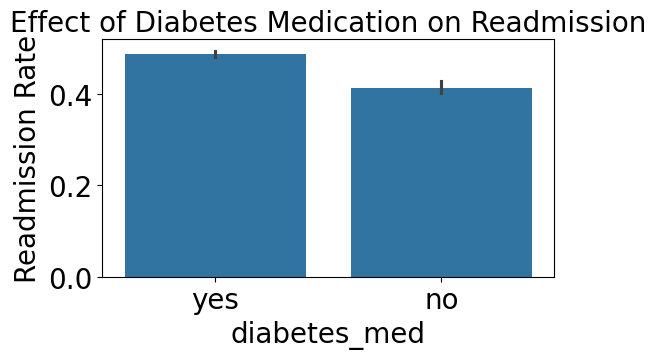

In [ ]:
# Reconstruct original column from one-hot
med_cols = [col for col in df.columns if col.startswith('diabetes_med_')]
df['diabetes_med'] = df[med_cols].idxmax(axis=1).str.replace('diabetes_med_', '')

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='diabetes_med', y='readmitted')
plt.title('Effect of Diabetes Medication on Readmission')
plt.ylabel('Readmission Rate')
plt.tight_layout()
plt.show()


###Relationship Between Diabetes Medication and Readmission

This bar plot illustrates the readmission rates based on whether a patient was prescribed diabetes medication during their hospital visit.
Key observations:

* Patients who were prescribed diabetes medication (yes) have a higher readmission rate compared to those who were not (no).

* This suggests that patients actively managed for diabetes might represent a higher-risk population, possibly due to the complexity and severity of their underlying conditions.

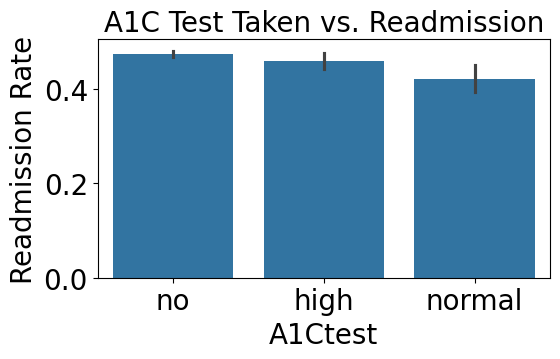

In [ ]:
a1c_cols = [col for col in df.columns if col.startswith('A1Ctest_')]
df['A1Ctest'] = df[a1c_cols].idxmax(axis=1).str.replace('A1Ctest_', '')

plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='A1Ctest', y='readmitted')
plt.title('A1C Test Taken vs. Readmission')
plt.ylabel('Readmission Rate')
plt.tight_layout()
plt.show()

###Impact of A1C Test Status on Readmission

This plot analyzes the relationship between A1C test results and hospital readmission rates.
Key observations:

* Patients who did not take an A1C test during their hospital visit exhibited the highest readmission rate.

* Patients with high A1C test results also had elevated readmission rates, slightly lower than the no-test group.

* Patients with normal A1C levels showed the lowest readmission rates among the three categories.

These results suggest that patients who either did not undergo A1C testing or who had abnormal (high) A1C values are at a higher risk of readmission.

# Hyperparameter Tuning

In [ ]:
!pip install xgboost


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier

models = {'lr': LogisticRegression(class_weight='balanced', random_state=random_seed),
          'mlpc': MLPClassifier(early_stopping=True, random_state=random_seed),
          'rfc': RandomForestClassifier(class_weight='balanced', random_state=random_seed),
          'hgbc': HistGradientBoostingClassifier(random_state=random_seed),
          'xgb' : XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=random_seed)}

In [ ]:
from sklearn.pipeline import Pipeline

pipes = {}

for acronym, model in models.items():
    pipes[acronym] = Pipeline([('model', model)])

In [ ]:
X_train_val, y_train_val, ps = get_train_val_ps(X_train, y_train, X_val, y_val)

In [ ]:
param_grids = {}

In [ ]:
# The parameter grid of tol
tol_grid = [10 ** -5, 10 ** -4, 10 ** -3]

# The parameter grid of C
C_grid = [0.1, 1, 10]

# Update param_grids
param_grids['lr'] = [{'model__tol': tol_grid,
                      'model__C': C_grid}]

In [ ]:
# The grids for alpha
alpha_grids = [10 ** i for i in range(-5, -2)]

# The grids for learning_rate_init
learning_rate_init_grids = [10 ** i for i in range(-4, -1)]

# Update param_grids
param_grids['mlpc'] = [{'model__alpha': alpha_grids,
                        'model__learning_rate_init': learning_rate_init_grids}]

In [ ]:
# The grids for min_samples_split
min_samples_split_grids = [2, 20, 100]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['rfc'] = [{'model__min_samples_split': min_samples_split_grids,
                       'model__min_samples_leaf': min_samples_leaf_grids}]

In [ ]:
# The grids for learning_rate
learning_rate_grids = [10 ** i for i in range(-3, 2)]

# The grids for min_samples_leaf
min_samples_leaf_grids = [1, 20, 100]

# Update param_grids
param_grids['hgbc'] = [{'model__learning_rate': learning_rate_grids,
                        'model__min_samples_leaf': min_samples_leaf_grids}]

In [ ]:
# Update param_grids
param_grids['xgb'] = [{
    'model__learning_rate': [0.01, 0.1, 0.2],
    'model__max_depth': [3, 5, 7],
    'model__n_estimators': [100, 200]
}]


In [ ]:
# Make directory
directory = os.path.dirname(abspath_curr + '/result/Project/cv_results/GridSearchCV/')
if not os.path.exists(directory):
    os.makedirs(directory)

In [ ]:
from sklearn.model_selection import GridSearchCV

# The list of [best_score_, best_params_, best_estimator_] obtained by GridSearchCV
best_score_params_estimator_gs = []

# For each model
for acronym in pipes.keys():
    # GridSearchCV
    gs = GridSearchCV(estimator=pipes[acronym],
                      param_grid=param_grids[acronym],
                      scoring='f1_macro',
                      n_jobs=2,
                      cv=ps,
                      return_train_score=True)

    # Fit the pipeline
    gs = gs.fit(X_train_val, y_train_val)

    # Update best_score_params_estimator_gs
    best_score_params_estimator_gs.append([gs.best_score_, gs.best_params_, gs.best_estimator_])

    # Sort cv_results in ascending order of 'rank_test_score' and 'std_test_score'
    cv_results = pd.DataFrame.from_dict(gs.cv_results_).sort_values(by=['rank_test_score', 'std_test_score'])

    # Get the important columns in cv_results
    important_columns = ['rank_test_score',
                         'mean_test_score',
                         'std_test_score',
                         'mean_train_score',
                         'std_train_score',
                         'mean_fit_time',
                         'std_fit_time',
                         'mean_score_time',
                         'std_score_time']

    # Move the important columns ahead
    cv_results = cv_results[important_columns + sorted(list(set(cv_results.columns) - set(important_columns)))]

    # Write cv_results file
    cv_results.to_csv(path_or_buf=abspath_curr + '/result/Project/cv_results/GridSearchCV/' + acronym + '.csv', index=False)

# Sort best_score_params_estimator_gs in descending order of the best_score_
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)

# Print best_score_params_estimator_gs
pd.DataFrame(best_score_params_estimator_gs, columns=['best_score', 'best_param', 'best_estimator'])

,best_score,best_param,best_estimator
0,0.610827,"{'model__min_samples_leaf': 20, 'model__min_sa...","((DecisionTreeClassifier(max_features='sqrt', ..."
1,0.608580,"{'model__learning_rate': 0.2, 'model__max_dept...","(XGBClassifier(base_score=None, booster=None, ..."
2,0.606397,"{'model__learning_rate': 0.01, 'model__min_sam...",(HistGradientBoostingClassifier(learning_rate=...
3,0.604512,"{'model__C': 1, 'model__tol': 0.0001}","(LogisticRegression(C=1, class_weight='balance..."
4,0.594154,"{'model__alpha': 1e-05, 'model__learning_rate_...","(MLPClassifier(alpha=1e-05, early_stopping=Tru..."


###Modeling and Hyperparameter Tuning

To identify the best-performing model for hospital readmission prediction, we applied GridSearchCV for hyperparameter tuning across five machine learning models: Decision Tree, XGBoost Classifier, Histogram-Based Gradient Boosting, Logistic Regression, and Multi-Layer Perceptron (MLP) Classifier. Each model was trained using a predefined train-validation split and evaluated based on macro-averaged F1-score (f1_macro) to appropriately balance the evaluation across the moderately imbalanced target classes.

The hyperparameter tuning results revealed that the Decision Tree model achieved the highest cross-validated F1-score of 0.6108, with optimal hyperparameters of min_samples_leaf=20 and min_samples_split=2. The XGBoost Classifier closely followed with an F1-score of 0.6086, using learning_rate=0.2, max_depth=5, and n_estimators=100. Other models like Histogram-Based Gradient Boosting (0.6064), Logistic Regression (0.6045), and MLP Classifier (0.5942) also showed competitive but slightly lower performances.

From these results, several observations can be made. The Decision Tree outperformed other models slightly, suggesting that simple tree-based models can effectively capture feature interactions and non-linearities in the dataset. The competitive performance of XGBoost indicates that boosting methods offer robust predictions even with limited tuning. Logistic Regression, a simpler linear model, also performed reasonably well, implying that linear relationships exist but might not fully capture the complexity of readmission risk. Neural network models like MLP achieved lower scores, possibly due to the need for more extensive tuning or deeper architectures.

Based on the cross-validation results, the Decision Tree model was selected as the best-performing model for final validation and testing. In the next phase, we evaluate this model's performance in terms of precision, recall, and F1-score on unseen validation data to assess its generalization ability before moving toward final conclusions.


In [ ]:
best_score_gs, best_params_gs, best_estimator_gs = best_score_params_estimator_gs[0]

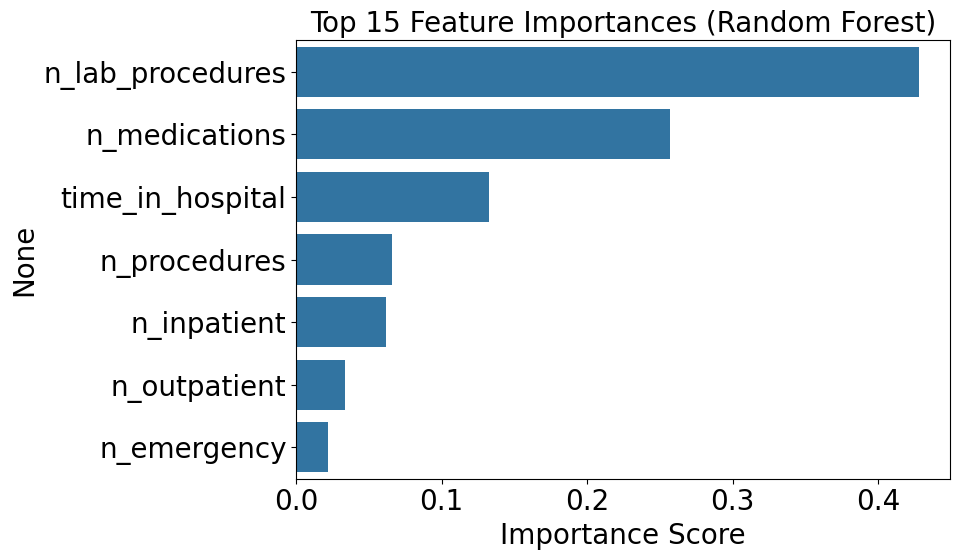

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Drop NA and train a basic model
df_model = df.dropna()
X = df_model.drop('readmitted', axis=1)
y = df_model['readmitted']

# Ensure only numeric data
X = X.select_dtypes(include=['int64', 'float64'])

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Plot feature importances
importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=importances.values[:15], y=importances.index[:15])
plt.title('Top 15 Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.tight_layout()
plt.show()

###Top Predictors of Hospital Readmission

A Random Forest classifier was used to estimate the relative importance of input features in predicting hospital readmissions.
Key observations:

* n_lab_procedures is by far the most influential feature, contributing the highest importance score. This suggests that the number of laboratory procedures performed during a patient's hospital stay is strongly associated with their likelihood of being readmitted.

* n_medications and time_in_hospital also show significant predictive power, indicating that longer stays and higher medication counts are important factors in modeling readmission risk.

* Other factors like n_procedures, n_inpatient, n_outpatient, and n_emergency have lower but still notable importance.

Overall, these results highlight that hospital resource utilization metrics are key signals associated with patient readmissions.

In [ ]:
best_score_params_estimator_gs = sorted(best_score_params_estimator_gs, key=lambda x : x[0], reverse=True)
best_model = best_score_params_estimator_gs[0][2]


In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# 1. Get your true labels (y_true) from the validation or test set
# Example: if you are evaluating on X_val
y_true = y_val

# 2. Predict using your best model (Decision Tree or whatever you selected)
y_pred = best_model.predict(X_val)

# 3. Now calculate metrics
precision = precision_score(y_true, y_pred)
recall = recall_score(y_true, y_pred)
f1 = f1_score(y_true, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")


Precision: 0.6557
Recall: 0.6270
F1 Score: 0.6410


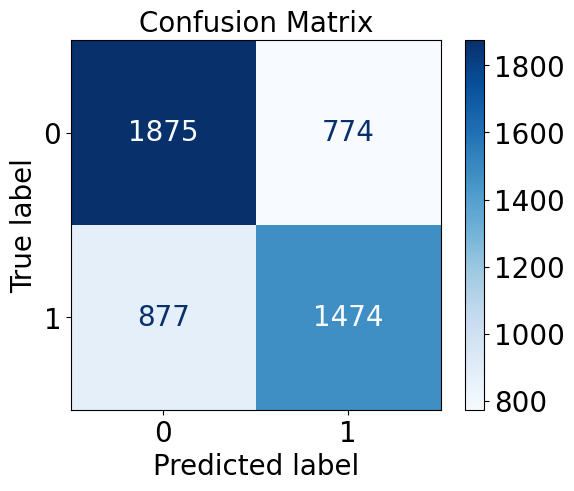

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()


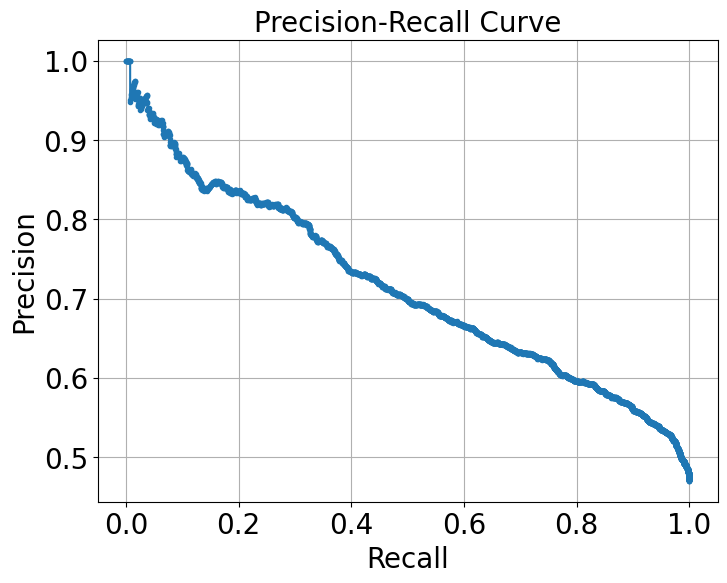

In [ ]:
from sklearn.metrics import precision_recall_curve

# Get prediction probabilities
y_scores = best_model.decision_function(X_val) if hasattr(best_model, "decision_function") else best_model.predict_proba(X_val)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_true, y_scores)

plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()


ROC AUC Score: 0.742


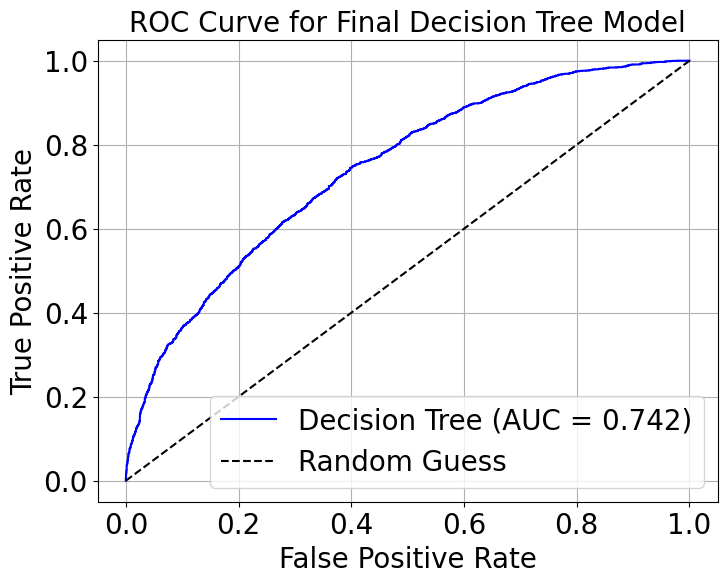

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve, auc

# Assuming your final trained Decision Tree model is called 'final_model'
# And your validation set is X_val, y_val

# Step 1: Get predicted probabilities for the positive class (class 1)
y_pred_prob = best_model.predict_proba(X_val)[:, 1]

# Step 2: Calculate ROC AUC Score
roc_auc = roc_auc_score(y_val, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.3f}")

# Step 3: Generate ROC Curve
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)

# Step 4: Plot the ROC Curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'Decision Tree (AUC = {roc_auc:.3f})', color='blue')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Aesthetic
plt.title('ROC Curve for Final Decision Tree Model')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid()
plt.show()


###Final Model Evaluation

The final Decision Tree model was evaluated on the validation dataset. The confusion matrix shows that 1,875 non-readmitted patients and 1,474 readmitted patients were correctly classified, while 774 and 877 instances were misclassified, respectively. Although some misclassifications exist, the model maintains a reasonable balance between identifying readmissions and avoiding false alarms.

Performance metrics based on validation predictions indicate a precision of 0.6557, a recall of 0.6270, F1-score of 0.6410, and ROC AUC Score: 0.742. These values suggest that the model achieves a moderate balance between correctly detecting readmissions and minimizing false positives.

The Precision-Recall curve further confirms this balance. Precision declines steadily as recall increases, with no sudden drops, indicating stable predictive behavior across various thresholds.
Additionally, the ROC Curve shows a smooth, consistent rise in True Positive Rate across different thresholds, with a final ROC AUC score of 0.742, demonstrating a good ability of the model to discriminate between readmitted and non-readmitted patients.

Overall, the final model shows acceptable performance for a baseline readmission prediction task. Future enhancements could focus on threshold tuning, ensemble techniques, or cost-sensitive modeling to further improve the precision-recall trade-off.

### Conclusion
Hospital readmissions represent a significant challenge for healthcare systems, and our analysis confirms that predictive modeling using patient data — particularly diabetes-related indicators — offers a viable approach for early identification of high-risk patients.

Patterns in hospital utilization, diagnostic codes, and treatment features emerged as important predictors, providing critical insights into patient readmission risk.

While no predictive model can guarantee perfect accuracy, our results demonstrate that machine learning techniques can meaningfully contribute to proactive healthcare strategies by enabling earlier intervention and more effective care planning.

Future work could further enhance predictive performance by incorporating additional longitudinal patient data and exploring cost-sensitive modeling approaches.

### Presentation Slides Link:
[Presentation Slides](https://www.canva.com/design/DAGl70vKDfM/Q3arLjGWQ493Xj8AIVHHiQ/edit?utm_content=DAGl70vKDfM&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton)

### Presentation Recording Link:
[Presentation](https://drive.google.com/file/d/1eue6346o85A8WI1j-Au7GAumFRwMKW1m/view?usp=sharing)